In [1]:
import numpy as np
import xarray as xr
import glob
import os
from pcmdi_metrics.graphics import portrait_plot

/global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/lib/python3.10/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(
ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/share/proj failed


In [2]:
mdl_list = ['CanESM5', 'CMCC-CM2-SR5', 'CNRM-ESM2-1', 'EC-Earth3', 'FGOALS-f3-L', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorCPM1']

In [3]:
filename1 = "Fig1.Mean_bias.TAS.nc"
filename2 = "Fig1.Mean_bias.PR.nc"

ds1 = xr.open_dataset(filename1)
ds2 = xr.open_dataset(filename2)

In [4]:
var1_data = ds1["tas"].values
var2_data = ds2["pr"].values

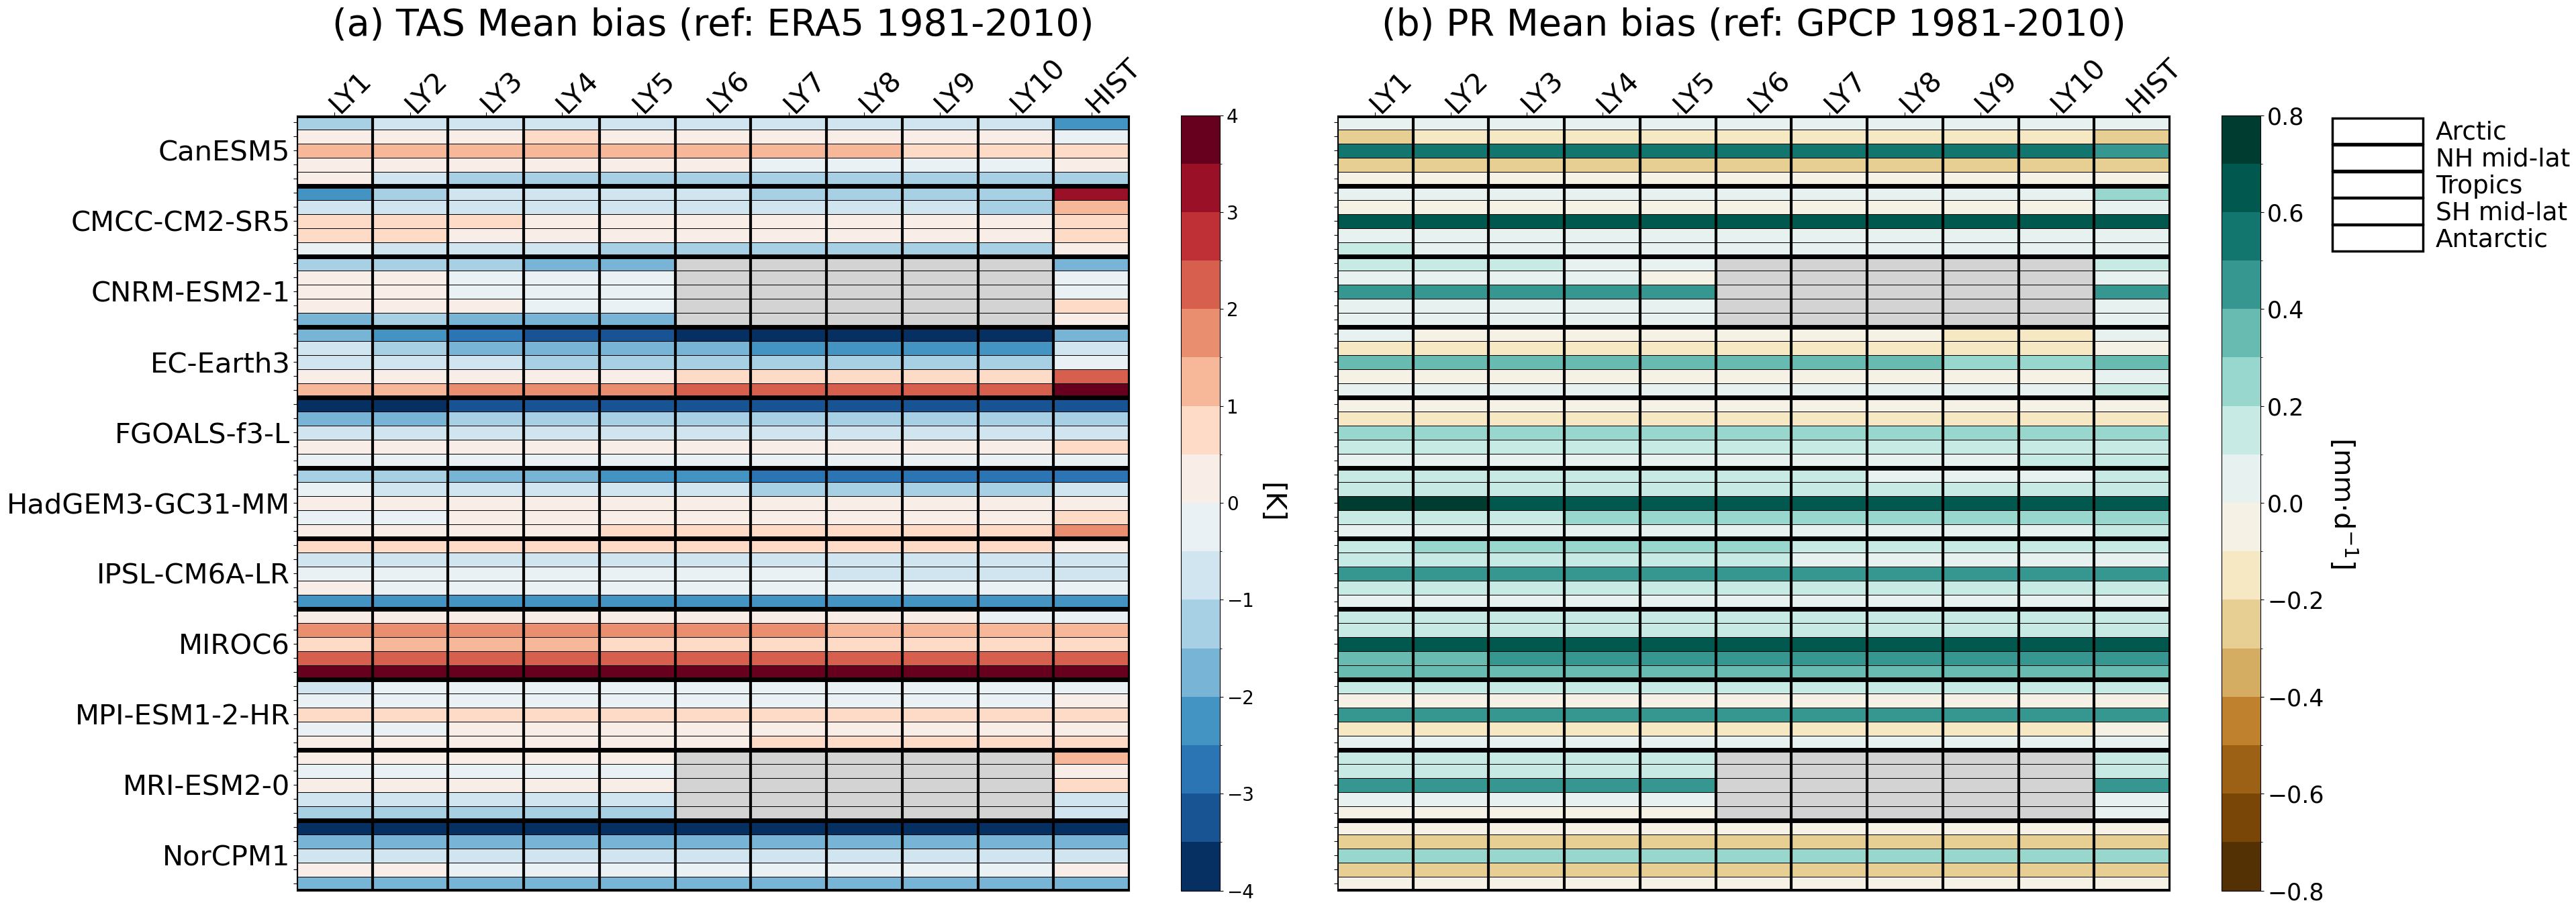

In [5]:
# Draw Portrait Plot for Mean bias (a) TAS, (b) PR
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

padded_mdl_list = []

for model in mdl_list:
    padded_mdl_list.extend(['', '', model, '', ''])  # 앞뒤로 2칸씩

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40,15))

xaxis_labels = ['LY1', 'LY2', 'LY3', 'LY4', 'LY5', 'LY6', 'LY7', 'LY8', 'LY9', 'LY10', 'HIST']
yaxis_labels = padded_mdl_list

xaxis_labels = [''+x for x in xaxis_labels]
yaxis_labels = [''+y for y in yaxis_labels]

fig, ax[0], cbar = portrait_plot([var1_data],
              fig=fig, ax=ax[0],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30,
              yaxis_labels=yaxis_labels, yaxis_fontsize=30,
              #legend_on=True,
              inner_line_color="k", 
              cmap="RdBu_r",
              cmap_bounds=[-4, -3.5, -3, -2.5, -2, -1.5, -1, -.5, 0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
              cbar_label='[K]', cbar_label_fontsize=30, cbar_tick_fontsize=20,
              missing_color='lightgrey',
              box_as_square=False, logo_off=True)
ax[0].set_title('(a) TAS Mean bias (ref: ERA5 1981-2010)', fontsize=40, pad=20)

fig, ax[1], cbar2 = portrait_plot([var2_data],
              fig=fig, ax=ax[1],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30, 
              yaxis_labels=[],
              inner_line_color="k",
              #inner_line_width=0,
              cmap="BrBG",
              cmap_bounds=[-.8, -.7, -.6, -.5, -.4, -.3, -.2, -.1, 0, .1, .2, .3, .4, .5, .6, .7, .8],
              cbar_label=r'[mm$\cdot$d$^{-1}$]', cbar_label_fontsize=30, cbar_tick_fontsize=25,
              missing_color='lightgrey',
              legend_labels=['NH'], legend_on=True, legend_box_size=3, legend_fontsize=25,
              box_as_square=False, logo_off=True)
ax[1].set_title('(b) PR Mean bias (ref: GPCP 1981-2010)', fontsize=40, pad=20)

plt.subplots_adjust(wspace=0, hspace=0)


for yy in range(0, 60, 5):
    ax[0].hlines(y=yy, xmin=0, xmax=11, colors='k', linestyles='-', linewidth=5, zorder=15)
    ax[1].hlines(y=yy, xmin=0, xmax=11, colors='k', linestyles='-', linewidth=5, zorder=15)
for xx in range(0, 12):
    ax[0].vlines(x=xx, ymin=0, ymax=55, colors='black', linestyles='-', linewidth=3, zorder=15)
    ax[1].vlines(x=xx, ymin=0, ymax=55, colors='black', linestyles='-', linewidth=3, zorder=15)

# Add legend
color = 'white'
labels = ['Arctic', 'NH mid-lat', 'Tropics', 'SH mid-lat', 'Antarctic']


handles = [Patch(facecolor=color, edgecolor='black', linewidth=2.5, label=label) for label in labels]

legend = ax[1].legend(
    handles=handles,
    loc='center left',
    bbox_to_anchor=(1.18, 0.91), 
    frameon=False,
    handlelength=3.6,
    handleheight=1.2,
    borderpad=0.0,
    labelspacing=0,
    fontsize=27,
    handletextpad=0.5
)
for text in legend.get_texts():
    text.set_verticalalignment('baseline')

#plt.savefig(f"_figs/Fig1.png", dpi=300, bbox_inches='tight', transparent=False)